In [4]:
pip install numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np # linear algebra
import pandas as pd

In [8]:
pip install openpyxl

     -------------------------------------- 242.2/242.2 kB 4.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
# Q4: Display Data By splitting age in 4 quartiles and labeling the quartiles

xls = pd.ExcelFile(r'C:\\Jupyter Notebook\\HospitalDatabase.xlsx')
#print(xls.sheet_names)
patients_df = pd.read_excel(xls, 'Patients')
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English
...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English


In [6]:
df = pd.concat(pd.read_excel(r'C:\\Jupyter Notebook\\HospitalDatabase.xlsx', sheet_name=None), ignore_index=True)
#print (df)

df.keys()

Index(['PatientID', 'FirstName', 'LastName', 'DateOfBirth', 'Gender', 'Race',
       'Language', 'EDVisitID', 'VisitDate', 'EDDischargeTime', 'Acuity',
       'ReasonForVisit', 'EDDisposition', 'VisitID', 'PatientMRN',
       'ProviderID', 'DateofVisit', 'DateScheduled', 'VisitDepartmentID',
       'VisitType', 'BloodPressureSystolic', 'BloodPressureDiastolic', 'Pulse',
       'VisitStatus', 'AdmissionID', 'AdmissionDate', 'DischargeDate',
       'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS',
       'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission',
       'EDVisitAfterDischargeFlag', 'ProviderName', 'ProviderSpecialty',
       'ProviderDateOnStaff'],
      dtype='object')

In [19]:
from datetime import datetime, date

# convert datetime column to just date
patients_df['DateOfBirth'] = pd.to_datetime(patients_df['DateOfBirth']).dt.date
#display(patients_df['DateOfBirth'])

# This function converts given date to age
def age(bdate):
    today = date.today()
    return today.year - bdate.year - ((today.month, 
                                      today.day) < (bdate.month, 
                                                    bdate.day))
  
patients_df['Age'] = patients_df['DateOfBirth'].apply(age)
  
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01,Male,White,English,62
1,2,Far,Myers,1985-11-15,Male,White,English,36
2,3,Devlin,Michael,1976-04-15,Male,White,English,46
3,4,Carmine,Texas,1968-10-15,Male,White,English,53
4,5,Tann,Bama,1962-05-01,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58


In [4]:
#sort the age column
#patients_df['Age']  = np.sort(patients_df['Age'])
patients_df = patients_df.sort_values(by = 'Age')
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
561,562,Dom,Baglow,1986-07-26,Male,Black/African-American,English,35
568,569,Ignazio,Melling,1986-12-25,Male,Black/African-American,English,35
674,675,Llewellyn,Group,1986-11-09,Female,White,English,35
689,690,Rudy,Inc,1987-01-30,Female,White,English,35
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35
...,...,...,...,...,...,...,...,...
640,641,Homenick,Wisniewski,1960-02-27,Female,Black/African-American,English,62
734,735,Hahn,Monnoyer,1960-03-21,Female,White,English,62
740,741,Rogahn,Group,1960-03-14,Female,White,English,62
337,338,Scottie,Phetteplace,1960-03-03,Female,White,English,62


In [5]:
patients_df.Age.unique()

array([35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62], dtype=int64)

In [20]:
bins = [35,40,50,60,70]
labels = ['Below 40','Below 50','Below 60','Below 70']
patients_df['AgeGroup'] = pd.cut(patients_df['Age'], bins=bins, labels=labels, right=False)
display(patients_df)


patients_df['Yr_qcut'] = pd.qcut(patients_df.Age, q=4,
                        labels=labels)
display(patients_df)

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup
0,1,Lanni,Sue,1960-01-01,Male,White,English,62,Below 70
1,2,Far,Myers,1985-11-15,Male,White,English,36,Below 40
2,3,Devlin,Michael,1976-04-15,Male,White,English,46,Below 50
3,4,Carmine,Texas,1968-10-15,Male,White,English,53,Below 60
4,5,Tann,Bama,1962-05-01,Male,White,English,60,Below 70
...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35,Below 40
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51,Below 60
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39,Below 40
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58,Below 60


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,AgeGroup,Yr_qcut
0,1,Lanni,Sue,1960-01-01,Male,White,English,62,Below 70,Below 70
1,2,Far,Myers,1985-11-15,Male,White,English,36,Below 40,Below 40
2,3,Devlin,Michael,1976-04-15,Male,White,English,46,Below 50,Below 50
3,4,Carmine,Texas,1968-10-15,Male,White,English,53,Below 60,Below 60
4,5,Tann,Bama,1962-05-01,Male,White,English,60,Below 70,Below 70
...,...,...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26,Male,Black/African-American,English,35,Below 40,Below 40
941,942,Wandie,Baythrop,1970-06-10,Male,Black/African-American,English,51,Below 60,Below 60
942,943,Diahann,Smeeton,1983-01-08,Male,Black/African-American,English,39,Below 40,Below 40
943,944,Panchito,Sharple,1963-06-05,Male,Black/African-American,English,58,Below 60,Below 70


In [50]:
pip install matplotlib


     ---------------------------------------- 7.2/7.2 MB 4.1 MB/s eta 0:00:00
     -------------------------------------- 930.9/930.9 kB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 55.3/55.3 kB 3.0 MB/s eta 0:00:00
     ---------------------------------------- 3.3/3.3 MB 3.7 MB/s eta 0:00:00


Text(0.5, 1.0, 'fig')

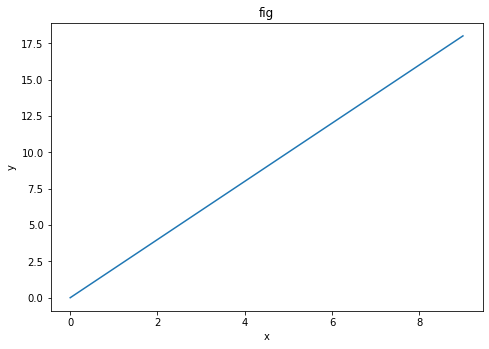

In [53]:
#Q3:"Create a figure object called fig using plt.figure() **
# ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
# ** Plot (x,y) on that axes and set the labels and titles to match the plot below:**"


import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0,10)
y = x*2

%matplotlib inline

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('fig')

In [54]:
pip install seaborn

     -------------------------------------- 292.8/292.8 kB 2.6 MB/s eta 0:00:00
     ---------------------------------------- 36.9/36.9 MB 3.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


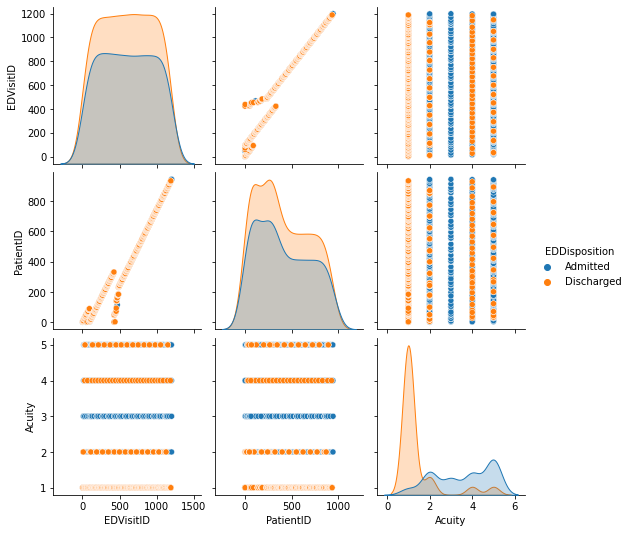

In [7]:
# Q7 : Create a pair plot by taking parameter "hue" as EDDisposition

import seaborn as sn

visits_df = pd.read_excel(xls, 'EDVisits')
#display(visits_df)

sn.pairplot(visits_df, hue='EDDisposition')

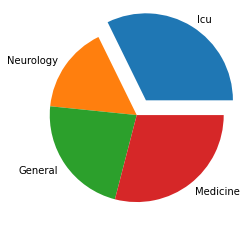

In [22]:
#Q11: Create a pie chart by taking Service= ["Icu", "Neurology", "General", "Medicine"] & EcpectedLOS=[10,5,7,9] &explode the wedge with highest LOS

import matplotlib.pyplot as plt

ExLOS = np.array([10,5,7,9])
Service= ["Icu", "Neurology", "General", "Medicine"]
explod = [0.2, 0, 0, 0]

plt.pie(ExLOS, labels = Service, explode = explod)
plt.show() 


In [32]:
# import numpy as np
# import matplotlib.pyplot as plt

# plt.rcParams["figure.figsize"] = [7.50, 3.50]
# plt.rcParams["figure.autolayout"] = True

# fig, axes = plt.subplots(2, 2)

# """ Iterate column's axes"""
# def iterate_columns(cols, x):
#    for col in cols:
#       col.plot(x, color='red')

# """ Iterate row's axes"""
# for row in axes:
#    x = np.random.normal(0, 1, 50).cumsum()
#    iterate_columns(row, x)

# plt.show()

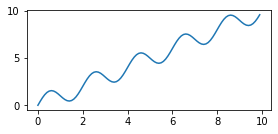

In [57]:
# Q13: Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x

plt.subplot(2, 2,1)
plt.plot(x,y)

In [101]:
# Q15 : Replace all the null values in ReadmissionFlag with 0

readmit_df = pd.read_excel(xls, 'ReAdmissionRegistry')
display(readmit_df) #shows NaN values in ReadmissionFlag

readmit_df['ReadmissionFlag'] = readmit_df['ReadmissionFlag'].fillna(0)
display(readmit_df) #replaced NaN with 0 for ReadmissionFlag

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,NaN,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,NaN,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,NaN,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,NaN,NaN,NaN


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,389,1,2018-01-01,2018-01-04 19:59:31.391,Home,Hospitalist,Kidney Failure,6.717771,0.010046,0.0,NaN,NaN
1,635,2,2018-01-01,2018-01-04 21:28:51.898,Home,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0
2,606,3,2018-01-01,2018-01-04 22:28:23.672,Home,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0
3,587,5,2018-01-01,2018-01-05 05:47:04.933,Home,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0
4,640,6,2018-01-01,2018-01-05 14:18:30.029,Home,ICU,Heart Failure,13.650953,0.408898,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
715,521,738,2018-02-22,2018-03-07 21:22:10.061,Home,Cardiology,AMI,13.725405,0.388319,0.0,NaN,NaN
716,548,739,2018-02-22,2018-03-08 02:43:18.749,Home,ICU,Pneumonia,11.355456,0.088518,0.0,NaN,NaN
717,509,740,2018-02-22,2018-03-08 09:27:18.377,Home,Hospitalist,Pneumonia,4.819882,0.503308,0.0,NaN,NaN
718,605,741,2018-02-22,2018-03-10 06:06:12.068,Home,General Medicine,Flu,3.123064,0.655870,0.0,NaN,NaN


In [75]:
# Q24: Get the count of number of patients based on ReasonForVisit and EDDisposition. Use stack/unstack functions

patientcount_df = visits_df[['PatientID','ReasonForVisit', 'EDDisposition']].groupby(['ReasonForVisit', 'EDDisposition']).count()
patientcount_df = patientcount_df.unstack()
patientcount_df.fillna(0, inplace=True)
patientcount_df.columns = patientcount_df.columns.get_level_values(1)
patientcount_df

EDDisposition,Admitted,Discharged
ReasonForVisit,,
Accident,39.0,0.0
Bleeding,16.0,15.0
Car Accident,17.0,0.0
Chest Pain,94.0,15.0
Cough,0.0,1.0
Fever,46.0,188.0
Gun Shot,16.0,0.0
Intoxication,0.0,30.0
Laceration,0.0,30.0


Text(0, 0.5, 'DepartmentID')

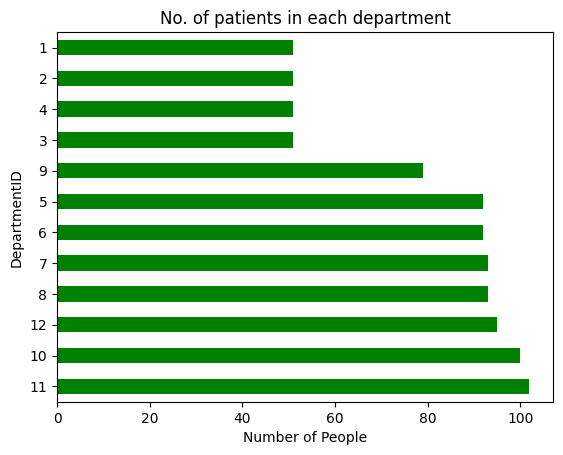

In [104]:
# Q25 :Plot a graph by counting the no. of patients in each department
 
Ambvisits_df = pd.read_excel(xls, 'AmbulatoryVisits') 

Countpatients = pd.value_counts(Ambvisits_df['VisitDepartmentID'].values, sort=True)

Countpatients.plot.barh(title='No. of patients in each department', color='green')
plt.xlabel('Number of People')
plt.ylabel('DepartmentID')


,PatientID
DischargeDisposition,
Expired,104
Home,577
Transfer,39


Text(0, 0.5, 'Discharge Disposition')

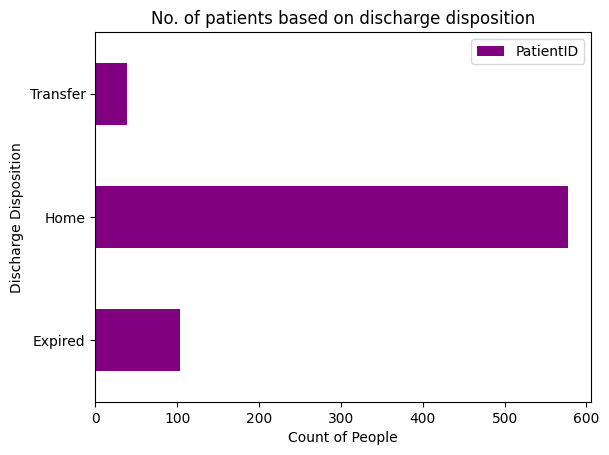

In [33]:
# Q27: Plot a graph to count the patients based on discharge disposition

discharge_df = pd.read_excel(xls, 'Discharges')
patientcnt_df = discharge_df[['PatientID','DischargeDisposition']].groupby(['DischargeDisposition']).count()
print(patientcnt_df)
patientcnt_df.plot.barh(title='No. of patients based on discharge disposition', color='purple')
plt.xlabel('Count of People')
plt.ylabel('Discharge Disposition')

In [103]:
# Q20 : Count of number of patients admitted based on Primary Diagnosis and Service provided

patientadm_df = readmit_df[['PatientID','PrimaryDiagnosis', 'Service']].groupby(['PrimaryDiagnosis','Service']).count()
patientadm_df = patientadm_df.rename(columns={'PatientID': 'No.of Patients'})
display(patientadm_df)

No.of Patients
PrimaryDiagnosis   Service                         
AMI                Cardiology                    40
                   Hospitalist                    1
                   ICU                            5
                   Neurology                      2
Afib               Cardiology                    10
                   ICU                            1
Broken Leg         Cardiology                     3
                   General Medicine               3
                   Hospitalist                    3
Diabetes           General Medicine              38
                   Hospitalist                   26
Fever              General Medicine              13
                   Hospitalist                    3
                   ICU                            3
Flu                Cardiology                     2
                   General Medicine              54
                   Hospitalist                   19
                   ICU                            3
                   Neurology                      2
Heart Failure      Cardiology                    39
                   ICU                           33
                   Neurology                      6
Hip Fracture       Orthopeadics                  23
Hypertension       General Medicine              35
                   Hospitalist                    6
                   ICU                            4
                   Neurology                      5
Kidney Failure     Cardiology                     1
                   General Medicine              12
                   Hospitalist                    6
                   ICU                            1
Knee Replacement   Hospitalist                    1
                   Orthopeadics                  22
Laceration         General Medicine              21
                   Hospitalist                    7
                   ICU                            1
Migraine           Neurology                     12
Pain               Neurology                      7
Pneumonia          General Medicine              67
                   Hospitalist                   28
                   ICU                           77
                   Neurology                      5
Spinal Cord Injury ICU                            2
Stroke             General Medicine              20
                   Hospitalist                    1
                   ICU                           21
                   Neurology                     26

In [71]:
# Q22 : Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet

df_new = pd.DataFrame()
df_new[["Date","Time"]] = readmit_df["DischargeDate"].astype(str).str.split(expand=True)
display(df_new)

,Date,Time
0,2018-01-04,19:59:31.391
1,2018-01-04,21:28:51.898
2,2018-01-04,22:28:23.672
3,2018-01-05,05:47:04.933
4,2018-01-05,14:18:30.029
...,...,...
715,2018-03-07,21:22:10.061
716,2018-03-08,02:43:18.749
717,2018-03-08,09:27:18.377
718,2018-03-10,06:06:12.068


In [40]:
# Q28 : Which reason of visit has maximum mortality rate

max_value = discharge_df["ExpectedMortality"]. max()
print('\n')
print('max mortality rate : ', max_value) # find the max mortality rate
pid = discharge_df[discharge_df.ExpectedMortality == max_value]
display(pid) #find the row with max mortality rate

# with the patientid find the reasonofvisit with high mortality from EDvisits
 
df_common = visits_df.loc[visits_df['PatientID'].isin(pid['PatientID'])]
print('\n')
print('The reason of visit that has maximum mortality rate is :', df_common.ReasonForVisit)



max mortality rate :  0.9899452598970535


,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
88,190,572,2018-02-14,2018-02-25 13:02:30.113,Expired,Neurology,Pneumonia,10.372029,0.989945




The reason of visit that has maximum mortality rate is : 353    Pneumonia
Name: ReasonForVisit, dtype: object


<AxesSubplot:>

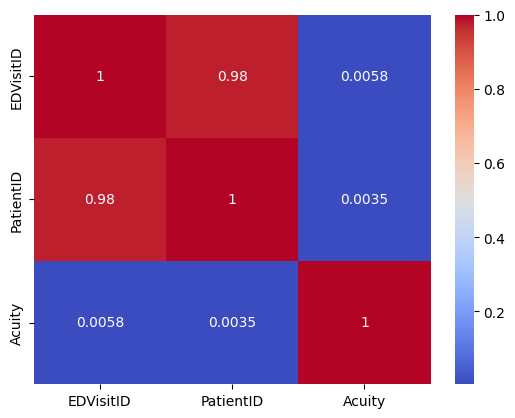

In [17]:
# Q17 : Create a heat map to show the correlation between the column values of Edvisits

sn.heatmap(visits_df.corr(), annot = True, fmt='.2g',cmap= 'coolwarm')

# Heatmap ignores the non numeric columns, so the below heatmap shows the correlation between numeric columns in Edvisits

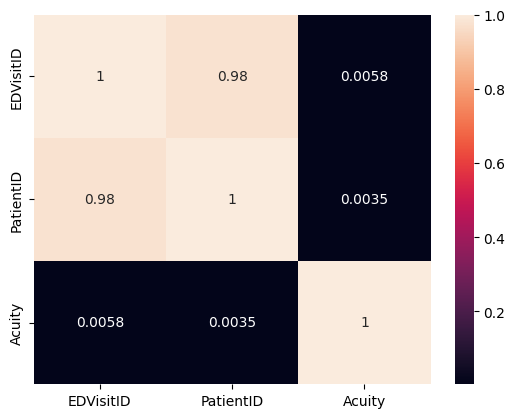

In [19]:
# Q36 : Create a correlation matrix on EDVisits

import matplotlib.pyplot as plt
corrMatrix = visits_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [31]:
# Q26 : Using Arrays and Loops, find the count of of patients based on gender

male_patients = 0
female_patients = 0

for index, row in patients_df.iterrows():
    if(row["Gender"]=='Male'):
        male_patients = male_patients + 1
    else:
        female_patients = female_patients + 1
        
print('No. of Male Patients:' , male_patients)
print('No. of Female Patients:' , female_patients)

No. of Male Patients: 537
No. of Female Patients: 408


                  ExpectedMortality
Service                            
Cardiology                 0.267605
General Medicine           0.271582
Hospitalist                0.319124
ICU                        0.457278
Neurology                  0.473460
Orthopeadics               0.322251


Service with lowest Expected Mortality is : Cardiology


Text(0, 0.5, 'ExpectedMortality')

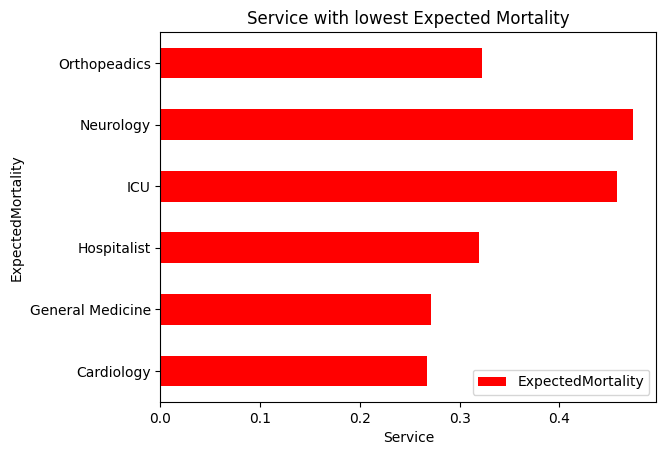

In [54]:
# Q33 : Using a bar chart, which Service had the lowest count of Expected Mortality?

mortality_df = discharge_df[['ExpectedMortality','Service']].groupby(['Service']).mean()
print(mortality_df)
minValueIndexObj = mortality_df.idxmin().loc[mortality_df.min().idxmin()]
print('\n')
print('Service with lowest Expected Mortality is :', minValueIndexObj )
mortality_df.plot.barh(title='Service with lowest Expected Mortality', color='red')
plt.xlabel('Service')
plt.ylabel('ExpectedMortality')


Number of patients on Transfer based on primary diagnosis

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Afib                1
Knee Replacement    1
Laceration          1
Pain                1
dtype: int64


Text(0, 0.5, 'Number of People')

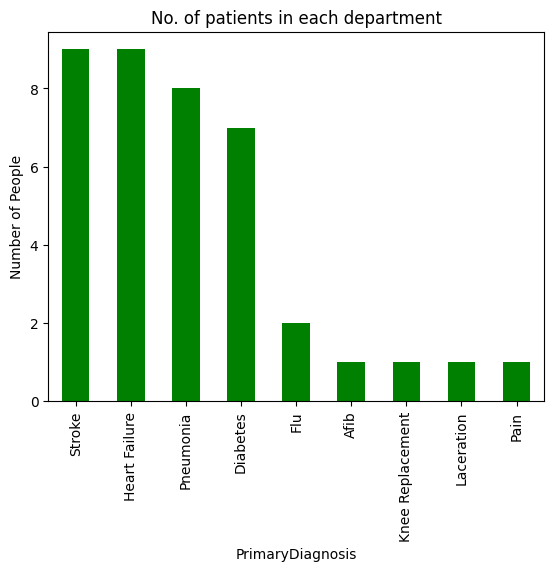

In [71]:
# Q38 : Number of patients on 'Transfer' based on primary diagnosis

trans_df = discharge_df.loc[discharge_df['DischargeDisposition'] == 'Transfer']

Cntpatients = pd.value_counts(trans_df['PrimaryDiagnosis'].values, sort=True)
print('Number of patients on Transfer based on primary diagnosis\n')
print(Cntpatients)
Cntpatients.plot.bar(title='No. of patients in each department', color='green')
plt.xlabel('PrimaryDiagnosis')
plt.ylabel('Number of People')



                     PatientID
ReasonForVisit                
Accident                    39
Bleeding                    31
Car Accident                17
Chest Pain                 109
Cough                        1
Fever                      234
Gun Shot                    16
Intoxication                30
Laceration                  30
Migraine                   156
Pneumonia                  201
Shortness of Breath        149
Stomach Ache               186


<AxesSubplot:xlabel='ReasonForVisit'>

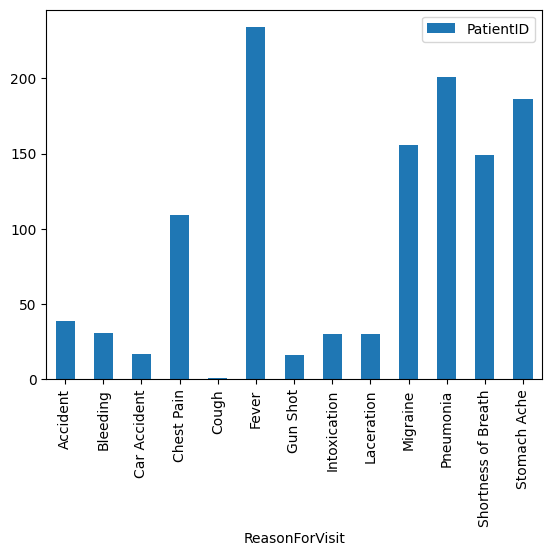

In [97]:
# Q40 : Plot a graph showing the count of patients for the reason visited the hospital.

count_df = visits_df[['PatientID','ReasonForVisit']].groupby(['ReasonForVisit']).count()
print(count_df)
count_df.plot(kind='bar')

In [106]:
# Q41 : Find the visit type with maximum 'No Show'

vst_df = Ambvisits_df.loc[Ambvisits_df['VisitStatus'] == 'No Show']
print(vst_df)
# Cntpatients = pd.value_counts(trans_df['PrimaryDiagnosis'].values, sort=True)
# print('Number of patients on Transfer based on primary diagnosis\n')

VisitID                                          817
PatientMRN                                       902
ProviderID                                        40
DateofVisit                      2019-04-06 00:00:00
DateScheduled             2019-03-31 19:39:35.738000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          188.0
BloodPressureDiastolic                    154.745416
Pulse                                      99.892384
VisitStatus                                  No Show
dtype: object
